# Apply Simulated Annealing and Tabu Search to solve the knapsack problem

**Purpose**: To apply Simulated Annealing and Tabu Search to solve the knapsack problem <br>
**Author**: Tin-Yuet CHUNG<br>
**Date**: 31 January 2022 <br>

**Contents**

- [1 Global environment and problem statement](#env)
- [2 Import packages](#import)
- [3 Read data](#read)
- [4 Functions](#func)
- [5 Run the Simulated Annealing algorithm](#run)
- [6 Run the Tabu Search algorithm](#run_tabu)

<a name='env'></a>
# 1 Global environment and problem statement

In [1]:
# check the python version on Anaconda
! python --version to get the python version.

Python 3.7.7


## problem statement
***Knapsack problem***

There are n items with specific weights and values (w, v) associated with each of those items.

The knapsack has a maximum total weight limit. 

The goal in this problem is to find the subset of items that a knapsack can contain, with the total weight remaining under the knapsack weight limit and without exceeding the maximum total value of items.

In this problem, our goal is to maximise the total value with the capacity constraint.

### The capacity of the knapsack must be kept at 1500.

<a name='import'></a>
# 2 Import packages

In [2]:
from random import random
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

<a name="read"></a>
# 3 Read data

In [3]:
df = pd.read_csv('knapsack.csv')

In [4]:
print(df)

    weights  values
0        21      96
1        12      99
2        30      52
3        24     100
4        45      46
..      ...     ...
95       47      93
96       28       6
97       24      53
98       25      12
99       16      39

[100 rows x 2 columns]


In [5]:
values = df['values'].to_numpy()
weights = df['weights'].to_numpy()
n_items = len(df)
capacity = 1500
print('number of items in the dataset/knapsack = ',n_items)
print('capacity of the knapsack = ',capacity)
print('values of items:')
print(values)
print('weights of items:')
print(weights)

number of items in the dataset/knapsack =  100
capacity of the knapsack =  1500
values of items:
[ 96  99  52 100  46  43  22  20  84  73  53  83  52  56  22  59  15   6
  69  61  22  41  63  56  13  17   1  42  49  16  67   2  12  96  98   4
  50  87  25  84  82  63   1  38  91  69  38  64  25  58  99  85  29  69
  36  99   9  26  82   9  54  81  74  15  44  36  48  59  15  91  65  17
  57  94  79  69  47  27  57  25  32  92  89  80  93  18  52  63  92  67
  39  75  82  61   9  93   6  53  12  39]
weights of items:
[21 12 30 24 45 47 41 36 38 45  4 17  1 42 26 19 12 27 15  4  5  4 21  7
 23 45 18  7 29 44 18  3  8  4 38 23 34 35 29 32 44 34 44 24  8  4 36 16
 34 33 27 36 26 25 25 47 20  6 13 35 42 49 11 39 30 21 26 25 33 38 16  5
 42 20 39  9  6 46 44 50 44  2 28 50 26 44  4 50 47 29 22 17 37  1 19 47
 28 24 25 16]


<a name='func'></a>
# 4 Functions

In [6]:
def evaluate(packing):
    '''
    Returns a list of [v,w], where v and w are the total value and weight of packing respectively

            Parameters:
                    packing (numpy array): numpy array of 1/0 to indicate a specified packing

            Returns:
            if  w > capacity:
            [w-capacity, w] (list):  (w-capacity) is total weight of packing minus the capacity
                                     w is the total weight of packing 
            else:
                    [v,w] (list):  v and w are the total value and weight of packing respectively
    '''
    array = np.array(packing)
    values_array = np.array(values)
    weights_array = np.array(weights)
    # compute the total value of the items
    v = np.dot(array, values_array)  
    # compute the total weight of the items
    w = np.dot(array, weights_array)  
    if w > capacity:
        return [w-capacity, w]
    # returns array list of both total values and weight
    else:
        return [v, w]  # returns array list of both totarrayl varraylues arraynd totarrayl weight

In [7]:
def One_Flip_Neighbourhood(packing):
    '''
    Returns a list of of all neighbours in the Neighbourhood of packing

            Parameters:
                    packing (numpy array): numpy array of 1/0 to indicate a specified packing

            Returns:
                    neighbourhood (list): a list of of all neighbours in the Neighbourhood of packing
                    The size of the 1-flip neighborhood = 100 
    '''    
    neighbourhood = []
    for i in range(0, n_items):
        temp = list(packing)
        neighbourhood.append(temp)
        if neighbourhood[i][i] == 1:
            neighbourhood[i][i] = 0
        else:
            neighbourhood[i][i] = 1
    return neighbourhood

In [8]:
def Initial_solution(initial_proportion_items):  #initial prop of items is proportion of items in initial solution
    '''
    Returns a numpy array of the a specified packing/ initial solution

            Parameters:
                    initial_proportion_items (float): proportion of items in initial solution

            Returns:
                    packing (numpy array): numpy array of 1/0 to indicate a specified packing/ initial solution
    '''
    # seed
    np.random.seed(1)    
    # Draw samples from a binomial distribution
    packing = np.random.binomial(1, initial_proportion_items, size=n_items)
    print("Random Initial Solution of proportion: ", initial_proportion_items)
    print(np.array(packing))
    return packing

In [9]:
def Simulated_Annealing(initial_proportion_items, initial_temperature, iter_per_temperature, final_temperature):
    '''
    Implementation of the Simulated Annealing with Cauchy cooling schedule AND one-flip neighbourhood
    Cauchy cooling schedule is defined to update the temperature T_k, 
    where T_k = initial_temperature/(k+1), and k is the temperature step
    
    
    Returns p: best packing, 
            v: total value of the items of the best packing, 
            w: total weight of the items of the best packing

            Parameters:
                   initial_proportion_items (float): proportion of items in initial solution
                   initial_temperature (float): initial temperature
                   iter_per_temperature (int): number of iterations per temperature
                   final_temperature (float): final temperature
            Returns:
                    p (numpy array): numpy array of 1/0 to indicate the best packing
                    v (float): total value of the items of the best packing
                    w (float): total weight of the items of the best packing
    '''
    print("Simulated Annealing")
    print("Initial Proportion of items = ", initial_proportion_items)
    print("Initial temperature = ", initial_temperature)
    print("Final temperature = ", final_temperature)
    print("Number of Iterations per temperature = ", iter_per_temperature)
    # initialises no. of solutions checked
    solutions_checked = 0
    # initialises no. of improving moves
    total_improvements = 0   
    # initialises no. of random moves
    total_random_steps = 0   
    # packing_current holds the current solution
    packing_current = Initial_solution(initial_proportion_items) 
    # packing_best holds the best solution
    packing_best = packing_current[:]  
    # e_current holds the evaluation of the current soluton
    e_current = evaluate(packing_current)[:]  
    e_best = e_current[:]
    k = 0
    # checks the temperature
    while (initial_temperature/(k+1) > final_temperature):  
        # Counts number of iterations at current temperature
        j = 0     
        # Counts number of improvements at current iteration
        improvements = 0   
        # Count number of random steps at current iteration
        random_steps = 0    
        while (j < iter_per_temperature):
            solutions_checked += 1
            # creates a list of all neighbours in the neighbourhood of packing_current
            Neighbourhood = One_Flip_Neighbourhood(packing_current)
            # Selects random neighbour
            s = Neighbourhood[random.randint(0, len(Neighbourhood)-1)]   
            if (evaluate(s)[0] > e_current[0]):
                packing_current = s[:]
                e_current = evaluate(s)[:]
                improvements += 1
            else:
                delta = evaluate(packing_current)[0] - evaluate(s)[0]
                probability = random.uniform(0,1)
                randomness = math.exp(-1 * delta * (k+1) / (initial_temperature))
                if (probability < randomness):
                    packing_current = s[:]
                    e_current = evaluate(s)[:]
                    random_steps += 1
             # Records the best value found so far
            if(e_current[0] > e_best[0]):   
                packing_best = packing_current[:]
                e_best = e_current[:]
            j += 1
        # increase the total improvements
        total_improvements += improvements   
        # increase the total random steps
        total_random_steps += random_steps         
        k += 1
    print("Total number of random steps:", total_random_steps,"\n",
          "Total number of improvements:", total_improvements)
    print("Number of packings checked:", solutions_checked)
    p = np.array(packing_best)
    v = e_best[0]
    w = e_best[1]
    return p, v, w

In [10]:
def Tabu_Search(initial_proportion_items, tabu_tenure, max_super_best_steps):   
    '''
    Implementation of the Tabu Search with one-flip neighbourhood
    
    Returns p: best packing, 
            v: total value of the items of the best packing, 
            w: total weight of the items of the best packing

            Parameters:
                   initial_proportion_items (float): proportion of items in initial solution
                   tabu_tenure (int): tabu tenure, i.e. a certain amount of time (or iterations) that the items are taboo
                   max_super_best_steps (int): maximum number of best steps, 
                   If the highest objective value found does not change for max_super_best_steps,
                   Tabu Search stops.
            Returns:
                    p (numpy array): numpy array of 1/0 to indicate the best packing
                    v (float): total value of the items of the best packing
                    w (float): total weight of the items of the best packing
    '''
    print("Tabu Search")
    print("Initial Proportion of items = ", initial_proportion_items)
    print("Tabu tenure = ", tabu_tenure)
    print("Maximum super best steps = ", max_super_best_steps)
    # initialises no. of solutions checked
    solutions_checked = 0
    # packing_current holds the currentent solution
    packing_current = Initial_solution(initial_proportion_items)  
    # packing_best holds the best solution
    packing_best = packing_current[:]  
    # e_current holds the evaluation of the currentent soluton
    e_current = evaluate(packing_current)  
    # e_best holds the best solution in neighbourhood
    e_best = e_current[:] 
    # e_super_best holds the best solution so far
    e_super_best = e_current[:] 
    #  tabu_list holds the tabu status of each element in solution
    tabu_list = [0] * n_items   
    # counts the number of non-improving steps
    count = 0                     
    while (count < max_super_best_steps):
        # creates a list of all neighbours in the Neighbourhood of packing_current
        Neighbourhood = One_Flip_Neighbourhood(packing_current) 
        # initialises the number of element changed in current step
        neighbour = 0   
        # resets the best neighbour value to be zero
        e_best[0] = 0    
        # evaluates every member in the neighbourhood of packing_current
        for s in Neighbourhood:  
            solutions_checked += 1
            if (evaluate(s)[0] > e_best[0]) and (tabu_list[neighbour]==0):  
                # finds the best member and keep track of that solution
                packing_current = s[:]
                # e_best holds the best solution in neighbourhood
                e_best = evaluate(s)[:]  
                # neighbour selected at the current step
                neighbour_selected = neighbour   
            # updates the best solution found so far
            if (evaluate(s)[0] > e_super_best[0]):    
                packing_current = s[:]
                e_best = evaluate(s)[:]
                e_super_best = evaluate(s)[:]
                packing_super = s[:]
                neighbour_selected = neighbour
                change = 1
            neighbour += 1
        # counts the number of steps with the improvement
        count += 1   
        # Records the change status
        if(change == 1):            
            count = 0
            change = 0
        # Updates the tabu status of each item
        for i in range(0,len(tabu_list)-1):   
            tt = tabu_list[i]
            if(tt > 0):
                tabu_list[i] = tt - 1
        # updates the tabu status of selected items
        tabu_list[neighbour_selected] = tabu_tenure   
        print("Neighbour selected:", neighbour_selected, ", Best_value:", e_best[0])
        print("Highest total value found:", e_super_best[0])
        print("\n")
    print("Number of packings checked:", solutions_checked)
    p = np.array(packing_super)
    v = e_super_best[0]
    w = e_super_best[1]
    return p, v, w  

In [11]:
def run_SA(number_runs, initial_proportion_items, 
           initial_temperature, iter_per_temperature,  final_temperature):
    '''
    Function to run Simulated Annealing with a specified number of runs
    
    Returns v_array: a list to store total value of the items of the best packing in number_runs times of run
            w_array: a list to store total weight of the items of the best packing in number_runs times of run

            Parameters:
                   number_runs (int): number of times to run Tabu Search
                   initial_proportion_items (float): proportion of items in initial solution
                   initial_temperature (float): initial temperature
                   iter_per_temperature (int): number of iterations per temperature
                   final_temperature (float): final temperature
            Returns:
                    v_array (list): a list to store total value of the items of the best packing in number_runs times of run
                    w_array (list): a list to store total weight of the items of the best packing in number_runs times of run
    '''
    v_array = []
    w_array = []
    for i in range(number_runs):
        print('Number of runs of the algorithm =',i+1)
        print("\nStarting solve() ")
        packing, v, w = Simulated_Annealing(initial_proportion_items,
                                initial_temperature, iter_per_temperature, 
                                final_temperature)
        print("\nBest packing found: ")
        print(packing)
        print("\nTotal value of packing = %0.1f " % v)
        print("Total weight of packing = %0.1f " % w)
        v_array.append(v)
        w_array.append(w)
        print("#############################################################################################")
    print("\nEnd")
    return v_array, w_array

In [12]:
def run_TS(number_runs, initial_proportion_items, 
           tabu_tenure, max_super_best_steps):
    '''
    Function to run Tabu Search with a specified number of runs
    
    Returns v_array: a list to store total value of the items of the best packing in number_runs times of run
            w_array: a list to store total weight of the items of the best packing in number_runs times of run

            Parameters:
                   number_runs (int): number of times to run Tabu Search
                   initial_proportion_items (float): proportion of items in initial solution
                   tabu_tenure (int): tabu tenure, i.e. a certain amount of time (or iterations) that the items are taboo
                   max_super_best_steps (int): maximum number of best steps, 
                   If the highest objective value found does not change for max_super_best_steps,
                   Tabu Search stops.
            Returns:
                    v_array (list): a list to store total value of the items of the best packing in number_runs times of run
                    w_array (list): a list to store total weight of the items of the best packing in number_runs times of run
    '''
    v_array = []
    w_array = []
    for i in range(number_runs):
        print('Number of runs of the algorithm =',i+1)
        print("\nStarting solve() ")
        packing, v, w = Tabu_Search(initial_proportion_items, 
                           tabu_tenure, max_super_best_steps)
        print("\nBest packing found: ")
        print(packing)
        print("\nTotal value of packing = %0.1f " % v)
        print("Total weight of packing = %0.1f " % w)
        v_array.append(v)
        w_array.append(w)
        print("#############################################################################################")
    print("\nEnd")
    return v_array, w_array

In [13]:
def plot_value_weight(v_array, w_array, name_algo, number_runs):    
    '''
    Function to plot the total value of the items of the best packing in  each time of running the algorithm,
    and print average total value and weight in number_runs times of run

            Parameters:
                    v_array (list): a list to store total value of the items of the best packing in number_runs times of run
                    w_array (list): a list to store total weight of the items of the best packing in number_runs times of run
                    name_algo (str): the name of the algorithm, i.e either "Simulated Annealing" or "Tabu Search"
                    number_runs (int): number of times to run the algorithm
    '''
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots(figsize=(10,8))
    # make a plot
    ax.plot(range(1,11),v_array, color="red", marker="o")
    ax.set_xlabel('Number of runs of the ' + str(name_algo),fontsize=15)
    ax.set_ylabel('Final total value of packing',color="red",fontsize=15)
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(range(1,11),w_array,color="blue",marker="x")
    ax2.set_ylabel('Final total weight of packing',color="blue",fontsize=15)
    plt.xticks(np.arange(1, 11, 1.0))
    plt.title("Final total value and weight of packing in " + str(number_runs)+ " runs",fontsize=18)
    plt.show()
    avg_v_total = np.mean(v_array)
    avg_w_total = np.mean(w_array)
    print("\nAverage total value of packing in "+ str(number_runs) +" runs = %0.1f " % avg_v_total)
    print("\nAverage total weight of packing in "+ str(number_runs) +" runs = %0.1f " % avg_w_total)

<a name='run'></a>
# 5 Run the Simulated Annealing algorithm

In [14]:
number_runs = 10               
initial_proportion_items = 0.1
initial_temperature = 8000
iter_per_temperature = 50
final_temperature = 5
name_algo = "Simulated Annealing"
v_array, w_array = run_SA(number_runs, initial_proportion_items, 
           initial_temperature, iter_per_temperature,  final_temperature)

Number of runs of the algorithm = 1

Starting solve() 
Simulated Annealing
Initial Proportion of items =  0.1
Initial temperature =  8000
Final temperature =  5
Number of Iterations per temperature =  50
Random Initial Solution of proportion:  0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0]
Total number of random steps: 4992 
 Total number of improvements: 5049
Number of packings checked: 79950

Best packing found: 
[1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1
 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1]

Total value of packing = 4420.0 
Total weight of packing = 1498.0 
#############################################################################################
Number of runs of the algorithm = 2

Starting solve() 

Total number of random steps: 5243 
 Total number of improvements: 5301
Number of packings checked: 79950

Best packing found: 
[1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1]

Total value of packing = 4380.0 
Total weight of packing = 1487.0 
#############################################################################################

End


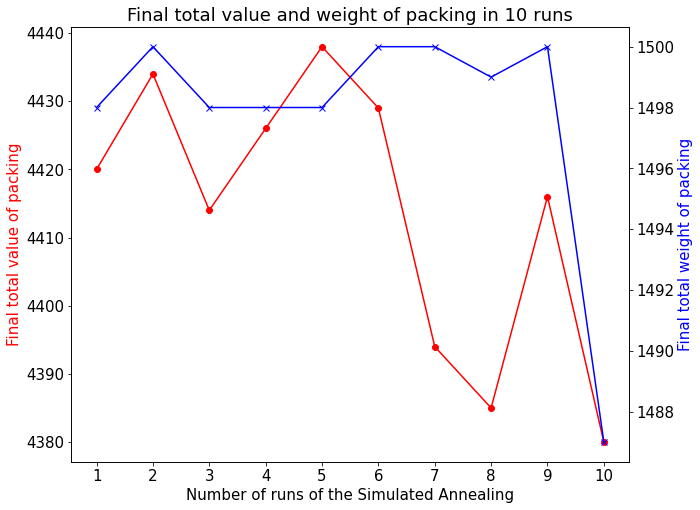


Average total value of packing in 10 runs = 4413.6 

Average total weight of packing in 10 runs = 1497.8 


In [15]:
plot_value_weight(v_array, w_array, name_algo, number_runs)

<a name='run_tabu'></a>
# 6 Run the Tabu Search algorithm

In [16]:
number_runs = 10               
initial_proportion_items = 0.1
tabu_tenure = 30
max_super_best_steps = 100
name_algo = "Tabu Search"
v_array, w_array = run_TS(number_runs, initial_proportion_items, 
           tabu_tenure, max_super_best_steps)

Number of runs of the algorithm = 1

Starting solve() 
Tabu Search
Initial Proportion of items =  0.1
Tabu tenure =  30
Maximum super best steps =  100
Random Initial Solution of proportion:  0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0]
Neighbour selected: 3 , Best_value: 544
Highest total value found: 544


Neighbour selected: 1 , Best_value: 643
Highest total value found: 643


Neighbour selected: 50 , Best_value: 742
Highest total value found: 742


Neighbour selected: 55 , Best_value: 841
Highest total value found: 841


Neighbour selected: 34 , Best_value: 939
Highest total value found: 939


Neighbour selected: 0 , Best_value: 1035
Highest total value found: 1035


Neighbour selected: 33 , Best_value: 1131
Highest total value found: 1131


Neighbour selected: 73 , Best_value: 1225
Highest total value found: 1225


Neigh

Neighbour selected: 90 , Best_value: 4299
Highest total value found: 4378


Neighbour selected: 23 , Best_value: 4243
Highest total value found: 4378


Neighbour selected: 38 , Best_value: 4218
Highest total value found: 4378


Neighbour selected: 36 , Best_value: 4268
Highest total value found: 4378


Neighbour selected: 72 , Best_value: 4211
Highest total value found: 4378


Neighbour selected: 66 , Best_value: 4259
Highest total value found: 4378


Neighbour selected: 16 , Best_value: 4274
Highest total value found: 4378


Neighbour selected: 48 , Best_value: 4249
Highest total value found: 4378


Neighbour selected: 4 , Best_value: 4295
Highest total value found: 4378


Neighbour selected: 10 , Best_value: 4242
Highest total value found: 4378


Neighbour selected: 78 , Best_value: 4185
Highest total value found: 4378


Neighbour selected: 64 , Best_value: 4229
Highest total value found: 4378


Neighbour selected: 13 , Best_value: 4173
Highest total value found: 4378


Neighbour sel

Neighbour selected: 49 , Best_value: 4106
Highest total value found: 4378


Neighbour selected: 16 , Best_value: 4091
Highest total value found: 4378


Neighbour selected: 43 , Best_value: 4053
Highest total value found: 4378


Neighbour selected: 48 , Best_value: 4078
Highest total value found: 4378


Neighbour selected: 94 , Best_value: 4069
Highest total value found: 4378


Neighbour selected: 10 , Best_value: 4122
Highest total value found: 4378


Neighbour selected: 54 , Best_value: 4086
Highest total value found: 4378


Neighbour selected: 13 , Best_value: 4142
Highest total value found: 4378


Neighbour selected: 60 , Best_value: 4088
Highest total value found: 4378


Neighbour selected: 97 , Best_value: 4141
Highest total value found: 4378


Neighbour selected: 12 , Best_value: 4193
Highest total value found: 4378


Neighbour selected: 86 , Best_value: 4245
Highest total value found: 4378


Neighbour selected: 31 , Best_value: 4247
Highest total value found: 4378


Neighbour se

Neighbour selected: 12 , Best_value: 4081
Highest total value found: 4378


Neighbour selected: 31 , Best_value: 4079
Highest total value found: 4378


Neighbour selected: 86 , Best_value: 4027
Highest total value found: 4378


Neighbour selected: 28 , Best_value: 3978
Highest total value found: 4378


Neighbour selected: 65 , Best_value: 4014
Highest total value found: 4378


Neighbour selected: 32 , Best_value: 4026
Highest total value found: 4378


Neighbour selected: 27 , Best_value: 3984
Highest total value found: 4378


Neighbour selected: 26 , Best_value: 3985
Highest total value found: 4378


Neighbour selected: 2 , Best_value: 3933
Highest total value found: 4378


Neighbour selected: 52 , Best_value: 3962
Highest total value found: 4378


Neighbour selected: 57 , Best_value: 3936
Highest total value found: 4378


Neighbour selected: 21 , Best_value: 3977
Highest total value found: 4378


Neighbour selected: 76 , Best_value: 4024
Highest total value found: 4378


Neighbour sel

Neighbour selected: 2 , Best_value: 4340
Highest total value found: 4340


Neighbour selected: 46 , Best_value: 4302
Highest total value found: 4340


Neighbour selected: 36 , Best_value: 4352
Highest total value found: 4352


Neighbour selected: 57 , Best_value: 4378
Highest total value found: 4378


Neighbour selected: 21 , Best_value: 4337
Highest total value found: 4378


Neighbour selected: 76 , Best_value: 4290
Highest total value found: 4378


Neighbour selected: 20 , Best_value: 4312
Highest total value found: 4378


Neighbour selected: 71 , Best_value: 4329
Highest total value found: 4378


Neighbour selected: 87 , Best_value: 4266
Highest total value found: 4378


Neighbour selected: 66 , Best_value: 4314
Highest total value found: 4378


Neighbour selected: 90 , Best_value: 4353
Highest total value found: 4378


Neighbour selected: 19 , Best_value: 4292
Highest total value found: 4378


Neighbour selected: 93 , Best_value: 4231
Highest total value found: 4378


Neighbour sel

Neighbour selected: 30 , Best_value: 3183
Highest total value found: 3183


Neighbour selected: 89 , Best_value: 3250
Highest total value found: 3250


Neighbour selected: 47 , Best_value: 3314
Highest total value found: 3314


Neighbour selected: 22 , Best_value: 3377
Highest total value found: 3377


Neighbour selected: 41 , Best_value: 3440
Highest total value found: 3440


Neighbour selected: 19 , Best_value: 3501
Highest total value found: 3501


Neighbour selected: 93 , Best_value: 3562
Highest total value found: 3562


Neighbour selected: 15 , Best_value: 3621
Highest total value found: 3621


Neighbour selected: 67 , Best_value: 3680
Highest total value found: 3680


Neighbour selected: 49 , Best_value: 3738
Highest total value found: 3738


Neighbour selected: 72 , Best_value: 3795
Highest total value found: 3795


Neighbour selected: 78 , Best_value: 3852
Highest total value found: 3852


Neighbour selected: 13 , Best_value: 3908
Highest total value found: 3908


Neighbour se

Neighbour selected: 84 , Best_value: 1318
Highest total value found: 1318


Neighbour selected: 95 , Best_value: 1411
Highest total value found: 1411


Neighbour selected: 81 , Best_value: 1503
Highest total value found: 1503


Neighbour selected: 88 , Best_value: 1595
Highest total value found: 1595


Neighbour selected: 44 , Best_value: 1686
Highest total value found: 1686


Neighbour selected: 69 , Best_value: 1777
Highest total value found: 1777


Neighbour selected: 82 , Best_value: 1866
Highest total value found: 1866


Neighbour selected: 37 , Best_value: 1953
Highest total value found: 1953


Neighbour selected: 51 , Best_value: 2038
Highest total value found: 2038


Neighbour selected: 8 , Best_value: 2122
Highest total value found: 2122


Neighbour selected: 39 , Best_value: 2206
Highest total value found: 2206


Neighbour selected: 11 , Best_value: 2289
Highest total value found: 2289


Neighbour selected: 58 , Best_value: 2371
Highest total value found: 2371


Neighbour sel

Neighbour selected: 87 , Best_value: 4236
Highest total value found: 4378


Neighbour selected: 12 , Best_value: 4184
Highest total value found: 4378


Neighbour selected: 86 , Best_value: 4132
Highest total value found: 4378


Neighbour selected: 31 , Best_value: 4130
Highest total value found: 4378


Neighbour selected: 27 , Best_value: 4088
Highest total value found: 4378


Neighbour selected: 43 , Best_value: 4126
Highest total value found: 4378


Neighbour selected: 56 , Best_value: 4117
Highest total value found: 4378


Neighbour selected: 32 , Best_value: 4129
Highest total value found: 4378


Neighbour selected: 57 , Best_value: 4103
Highest total value found: 4378


Neighbour selected: 94 , Best_value: 4112
Highest total value found: 4378


Neighbour selected: 28 , Best_value: 4063
Highest total value found: 4378


Neighbour selected: 54 , Best_value: 4099
Highest total value found: 4378


Neighbour selected: 20 , Best_value: 4077
Highest total value found: 4378


Neighbour se

Neighbour selected: 31 , Best_value: 4247
Highest total value found: 4378


Neighbour selected: 27 , Best_value: 4289
Highest total value found: 4378


Neighbour selected: 26 , Best_value: 4288
Highest total value found: 4378


Neighbour selected: 56 , Best_value: 4297
Highest total value found: 4378


Neighbour selected: 32 , Best_value: 4285
Highest total value found: 4378


Neighbour selected: 57 , Best_value: 4311
Highest total value found: 4378


Neighbour selected: 52 , Best_value: 4282
Highest total value found: 4378


Neighbour selected: 28 , Best_value: 4331
Highest total value found: 4378


Neighbour selected: 65 , Best_value: 4295
Highest total value found: 4378


Neighbour selected: 20 , Best_value: 4317
Highest total value found: 4378


Neighbour selected: 71 , Best_value: 4334
Highest total value found: 4378


Neighbour selected: 46 , Best_value: 4296
Highest total value found: 4378


Neighbour selected: 2 , Best_value: 4348
Highest total value found: 4378


Neighbour sel

Neighbour selected: 21 , Best_value: 3977
Highest total value found: 4378


Neighbour selected: 76 , Best_value: 4024
Highest total value found: 4378


Neighbour selected: 20 , Best_value: 4002
Highest total value found: 4378


Neighbour selected: 71 , Best_value: 3985
Highest total value found: 4378


Neighbour selected: 36 , Best_value: 3935
Highest total value found: 4378


Neighbour selected: 46 , Best_value: 3973
Highest total value found: 4378


Neighbour selected: 90 , Best_value: 3934
Highest total value found: 4378


Neighbour selected: 19 , Best_value: 3995
Highest total value found: 4378


Neighbour selected: 93 , Best_value: 4056
Highest total value found: 4378


Neighbour selected: 15 , Best_value: 4115
Highest total value found: 4378


Neighbour selected: 66 , Best_value: 4067
Highest total value found: 4378


Neighbour selected: 38 , Best_value: 4092
Highest total value found: 4378


Neighbour selected: 64 , Best_value: 4048
Highest total value found: 4378


Neighbour se

Neighbour selected: 90 , Best_value: 4353
Highest total value found: 4378


Neighbour selected: 19 , Best_value: 4292
Highest total value found: 4378


Neighbour selected: 93 , Best_value: 4231
Highest total value found: 4378


Neighbour selected: 15 , Best_value: 4172
Highest total value found: 4378


Neighbour selected: 99 , Best_value: 4211
Highest total value found: 4378


Neighbour selected: 49 , Best_value: 4153
Highest total value found: 4378


Neighbour selected: 64 , Best_value: 4197
Highest total value found: 4378


Neighbour selected: 16 , Best_value: 4212
Highest total value found: 4378


Neighbour selected: 13 , Best_value: 4156
Highest total value found: 4378


Neighbour selected: 43 , Best_value: 4194
Highest total value found: 4378


Neighbour selected: 94 , Best_value: 4203
Highest total value found: 4378


Neighbour selected: 10 , Best_value: 4150
Highest total value found: 4378


Neighbour selected: 97 , Best_value: 4097
Highest total value found: 4378


Neighbour se

Neighbour selected: 33 , Best_value: 1131
Highest total value found: 1131


Neighbour selected: 73 , Best_value: 1225
Highest total value found: 1225


Neighbour selected: 84 , Best_value: 1318
Highest total value found: 1318


Neighbour selected: 95 , Best_value: 1411
Highest total value found: 1411


Neighbour selected: 81 , Best_value: 1503
Highest total value found: 1503


Neighbour selected: 88 , Best_value: 1595
Highest total value found: 1595


Neighbour selected: 44 , Best_value: 1686
Highest total value found: 1686


Neighbour selected: 69 , Best_value: 1777
Highest total value found: 1777


Neighbour selected: 82 , Best_value: 1866
Highest total value found: 1866


Neighbour selected: 37 , Best_value: 1953
Highest total value found: 1953


Neighbour selected: 51 , Best_value: 2038
Highest total value found: 2038


Neighbour selected: 8 , Best_value: 2122
Highest total value found: 2122


Neighbour selected: 39 , Best_value: 2206
Highest total value found: 2206


Neighbour sel

Neighbour selected: 54 , Best_value: 4099
Highest total value found: 4378


Neighbour selected: 20 , Best_value: 4077
Highest total value found: 4378


Neighbour selected: 71 , Best_value: 4060
Highest total value found: 4378


Neighbour selected: 97 , Best_value: 4007
Highest total value found: 4378


Neighbour selected: 46 , Best_value: 4045
Highest total value found: 4378


Number of packings checked: 16000

Best packing found: 
[1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0]

Total value of packing = 4378.0 
Total weight of packing = 1500.0 
#############################################################################################

End


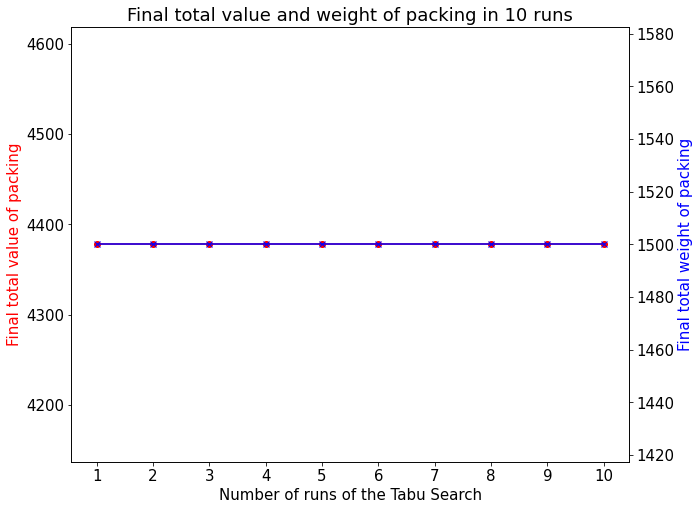


Average total value of packing in 10 runs = 4378.0 

Average total weight of packing in 10 runs = 1500.0 


In [17]:
plot_value_weight(v_array, w_array, name_algo, number_runs)

# End